**Name: Christ-Brian Amedjonekou**  
**Date: 2/25/2019**  
**PHYS 3600ID-D862 (Machine Learning) HW 2**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva**


***I certify that my work is my own.***

## Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy as sci
import seaborn as sns
import math as m

## Tasks

The worksheet is organized as a series of tasks. You can edit this notebook directly by adding code (and comment) cells to perform these tasks. You will need to import packages, even if this is not explicitly requested.

One function from a package that we haven't mentioned so far but you might need is scipy.integrate (numerical integration).

#### Task 1: import the data from the file sn_data.txt

This data set contains three columns. 

The first one is the redshift of the supernovae. Redshift is a measure of the velocity at which supernovae are moving away from us. Redshift = 0 means no motion, increasing values represent increasing velocity. Redshift has no units.

The second column is the distance of the supernovae, expressed in the units of Mpc (megaparsec). Mega = 1 Million; 1 parsec (pc) = 3.26 light years.

The third column contains the error on the distance (let's call it sigma(d)), again expressed in Mpc.

In [2]:
# my
supernova = pd.read_excel('Datasets/sn_data.xlsx')
supernova.head(10)

,#z,d,d_err
0,0.010,51.5229,8.77905
1,0.010,43.6516,7.63887
2,0.010,55.4626,9.96117
3,0.013,63.6796,9.09091
4,0.013,55.7186,7.69781
5,0.014,66.9885,8.94630
6,0.014,66.6807,8.90520
7,0.014,76.9130,10.27170
8,0.015,82.4138,10.62680
9,0.016,80.5378,10.01400


In [3]:
supernova.tail(5)

,#z,d,d_err
201,1.305,7979.95,1102.470
202,1.340,9638.29,1375.960
203,1.370,11117.30,1279.930
204,1.390,9549.93,835.602
205,1.755,11749.00,1893.710


#### Task 2: Make an errorbar plot of this data set.

Place redshift (z) on the x axis, distance on the y axis, and sigma(d) as the error on the distance. Add labels to the axes and don't forget the units.

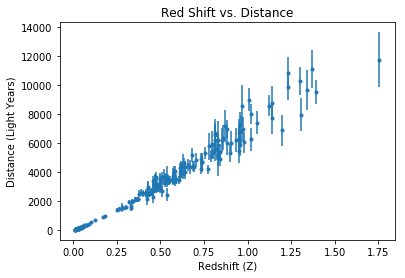

In [4]:
x, y, yerr = supernova['#z'], supernova['d'], supernova['d_err']
fig, ax1 = plt.figure(), plt.subplot()
ax1.errorbar(x, y, yerr, marker= '.', ls= 'None')
ax1.set(xlabel= 'Redshift (Z)', ylabel= 'Distance (Light Years)', title= 'Red Shift vs. Distance');

#### A few words on our model

The plot that you just made just shows the data. Now what we want to do is to build different models for the distance of these supernovae, and then choose the model that works best.

Our model for the distance (called "Luminosity Distance" by physicists) is a function of different parameters: 

- z (the redshift) is the independent variable; in other words, our model for the distance will return a distance for any redshift value.

- Omegam is the percentage of matter in the Universe, and it's a number between 0 and 1;

- OmegaDE is the percentage of Dark Energy in the Universe; we can assume that Omegam + OmegaDE = 1 (so the Universe only contains matter and dark energy), which simplifies our model a little bit, because we can write OmegaDE = 1 - Omegam;

- H0 is the Hubble constant, which gives the current rate of expansion of the Universe; we will fix it in the beginning to be = 70 km/s/Mpc;

- c is the speed of light in km/s; c = 2.99 x 10**5. This is a constant of nature so we won't need to change it.

Here comes our model:


\begin{align}
D_L(z,\Omega_m, H_0, c) = \,(1+z) \frac{c}{H_0}\int_0^z \frac{dx}{\sqrt{\Omega_m(1+x)^3 + \Omega_{DE}}} 
\end{align}

#### Task 3: Complete this function definition.

Notes: 

1. Omega_DE is not a parameter of the function, so make sure you write your function as a function of Omega_m only.

2. It might be easier to first define a function for the integrand
       
3. You might find useful to invoke the scipy.integrate.quad function of the scipy package and to look at the examples here
       
https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/integrate.html

       
def LumDist(z, Omegam = 0.7, H0 = 70, ckms = 2.9979 $\times 10^5$) :

    ###write the function here


In [5]:
def LumDist(z, omega_m= 0.7, H_0= 70, c_km_s= 2.9979*m.pow(10, 5)):
    """Calculates the Luminosity Distance"""
    # sci.integrate.quad(integrand, 0, z)[1] is the error
    constant = (1 + z)*(c_km_s/H_0)
    integrand = lambda x: 1/m.sqrt(omega_m * m.pow(1 + x, 3) + (1 - omega_m))
    return constant * sci.integrate.quad(integrand, 0, z)[0] 

#### Task 4

1. Answer the questions: What are the arguments of the LumDist function? Which ones have default values?

    * **z (redshift), omega_m (the percentage of matter in the Universe), H_0 is the Hubble constant (the current rate of expansion of the Universe), c (the speed of light in km/s).**
    $$\space$$
    * **omega_m (the percentage of matter in the Universe), H_0 is the Hubble constant (the current rate of expansion of the Universe), c (the speed of light in km/s) have default values.**
    $$\space$$
2. Check that LumDist(1) ~ 5512 and LumDist(0.5) ~ 2522

In [6]:
LumDist(1)

5512.274175117096

In [7]:
LumDist(0.5)

2521.9714288948917

#### Task 5

Vectorize the function so we can give it a 1D array of redshifts as input. Check that it works by 
defining a numpy array as the first column of your supernova data and feeding it to your function.

In [8]:
LumDist_vectorized = np.vectorize(LumDist)
LumDist_vectorized(supernova['#z'])[0:11]

array([43.02919451, 43.02919451, 43.02919451, 56.01606079, 56.01606079,
       60.35295154, 60.35295154, 60.35295154, 64.69379657, 69.03858787,
       69.03858787])

#### Task 6

Plot the data with error bars as before, and then the luminosity distance values for the supernovae predicted by these three models:
    
Model 1: Omega_m = 0 
    
Model 2: Omega_m = 0.3
    
Model 3: Omega_m = 1

Make sure you add labels for all the models.
    


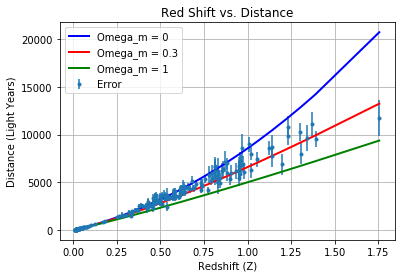

In [9]:
fig, ax1 = plt.figure(), plt.subplot()
ax1.errorbar(x, y, yerr, marker= '.', ls= 'None', label= 'Error')
ax1.plot(x, LumDist_vectorized(supernova['#z'], omega_m= 0), c= 'b', lw= 2, label= 'Omega_m = 0')
ax1.plot(x, LumDist_vectorized(supernova['#z'], omega_m= 0.3), c= 'r', lw= 2, label= 'Omega_m = 0.3')
ax1.plot(x, LumDist_vectorized(supernova['#z'], omega_m= 1), c= 'g', lw= 2, label= 'Omega_m = 1')
ax1.set(xlabel= 'Redshift (Z)', ylabel= 'Distance (Light Years)', title= 'Red Shift vs. Distance');
ax1.legend()
ax1.grid(True)

#### Task 7

Answer the following questions:

1. What are the Omega_DE values for the above models? Which model contains no Dark Energy at all?

    * when $\Omega_m = 0; \space \Omega_{DE} = 1 - \Omega_m = 1$, indicating there's only Dark Energy.
    * when $\Omega_m = 0.3; \space \Omega_{DE} = 1 - \Omega_m = 0.7$, indicating there's $0.7$ Dark Energy.
    * when $\Omega_m = 1; \space \Omega_{DE} = 1 - \Omega_m = 0$, indicating there's no Dark Energy.
    * Model $\Omega_m = 1$ contains no Dark Energy at all.
    $$\space$$
2. Just judging by eye, which model seems to be the best fit to the data and why?

    * $\Omega_m = 0.3; \space \Omega_{DE} = 1 - \Omega_m = 0.7$, is the model that seems to be the best fit to the data as it hits the majority of points. 

#### Task 8

It is now time to define a proper function to judge whether these models are good fit to the data. This is done through the $\chi^2$ function that we mentioned in the "Fit a line" worksheet.

Complete the following function:

def chi2(x,x_err,y): 

    Write a function that computes the chi2 between a vector containing measurements (x) and their experimental errors (x_err), with respect to a vector of model predictions y 

   

In [10]:
def model(x,m,b):
    return m*x+b #straight line

def chi2(m,b,x,y,err):
    """computes the chi2 between a vector containing measurements (x) 
    and their experimental errors (x_err), with respect to a vector 
    of model predictions y """
    return np.sum(((model(x,m,b) - y)**2)/err**2)

#### Task 9

Calculate the $\chi^2$ of the model with Omega_m = 0.3. 
    
(Hint: your "y" vector is the vector of luminosity distances for all the supernovae)

In [17]:
chi2(1, 0, supernova['d'], LumDist_vectorized(supernova['#z'], omega_m= 0.3), yerr)

308.1221776880534

#### Task 10

And now the magic begins!

1. Calculate and save the $\chi^2$ values for different models with values of Omega_m between 0 and 1, spaced every 0.05.

2. Create a scatter plot that has the values of Omega_m on the x axis, and the value of the $\chi^2$ on the y axis.

In [20]:
allchi2 = np.array([chi2(1,0,supernova['d'],LumDist_vectorized(supernova['#z'], omega_m= number),yerr) for number in np.arange(0, 1, 0.05)])
allchi2


array([ 447.81951104,  312.94109452,  254.30626851,  237.20959594,
        245.73655416,  271.14400378,  308.12217769,  353.22912659,
        404.12843292,  459.17881165,  517.19650109,  577.30986224,
        638.86642538,  701.37131864,  764.4452659 ,  827.79521495,
        891.19335824,  954.4618712 , 1017.46163137, 1080.08376209])

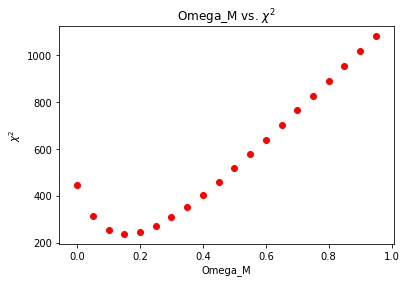

In [21]:
omegaM = np.arange(0, 1, 0.05)
fig; ax2 = plt.subplot()
ax2.scatter(omegaM, allchi2, c='r')
ax2.set(xlabel= 'Omega_M', ylabel= '$\chi^2$', title= 'Omega_M vs. $\chi^2$');

#### Task 11

Find the model with the lowest $\chi^2$ and answer the questions:

* shown below:

In [22]:
allchi2.min()

237.20959594170736

1. Which value of Omega_m corresponds to this model? 

In [25]:
omegaM[3]

0.15000000000000002

2. Which value of Omega_DE corresponds to this model?

In [26]:
1 - omegaM[3]

0.85

3. Based on your answers, is a non-zero value of Dark Energy supported by the data?

    * Yes it is supported.

#### Task 12 (optional, for Extra Credit)

Repeat the $\chi^2$ analysis for a two parameter model, with Omega_m varying between 0 and 1 in 0.05 intervals 
and H_0, the Hubble constant, varying between 50 and 80 km/s/Mpc in intervals of 5 km/s/Mpc.

What are the values of Omega_m and H_0 that correspond to the lowest $\chi^2$? How do your conclusions change in this case?

